<a href="https://colab.research.google.com/github/jehee-lee/Aerospace_capstone_design/blob/main/(%EC%8B%A4%EC%8A%B58)_%EB%8B%A8%EC%B8%B5_%ED%95%84%ED%84%B0_%ED%95%99%EC%8A%B5_%EB%B0%8F_%EA%B2%80%EC%A6%9D(1Layer_Filter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

                  #데이터 기본구조 생성


A = np.zeros((2,2))
B = np.zeros((2,1))
C = np.zeros((1,2))

#실험 조건, 데이터 사이즈 설정

N = 10000 #number of timesteps

x = np.zeros((2,N+1))
x[:,0]=[0,0]
y = np.zeros((1,N))
dx = np.zeros((1,N))

pos_t = np.zeros((1,N))
temp_pos_t = np.zeros((1,N))

T=500 #time will vary from 0 to T with step delt
ts = np.linspace(0, T, N+1)
del_t = T/N # delta_t = 0.05 = 500 / 10000
gamma = 0.05 #damping

#정규분포 노이즈 생성
np.random.seed(370)
w = np.random.randn(1,N)
n = np.random.randn(1,N)

# X행렬 구성성분
A[0,0] = 1
A[0,1] = (1-gamma*del_t/2)*del_t
A[1,1] = 1 - gamma*del_t

B[0,0] = del_t**2/2
B[1,0] = del_t

C[0,0] = 1

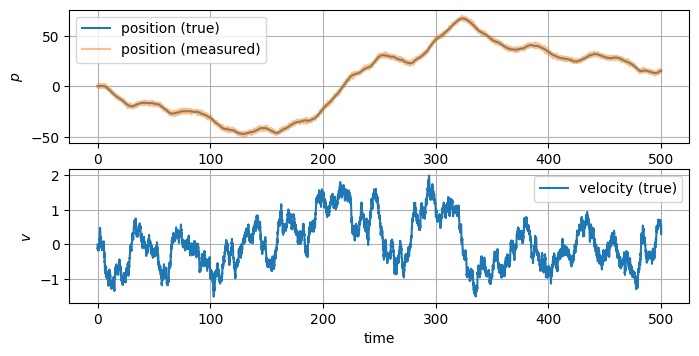

In [2]:
for t in range(N):
    y[:,t] = C.dot(x[:,t]) + n[:,t]
    x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])


plt.figure(figsize=(8,6), dpi=100)
plt.subplot(3,1,1)
plt.plot(ts,x[0,:], label='position (true)')
#measured 값은 y값으로 x+noise값이다.
plt.plot(ts[:-1],y[0,:], alpha=0.5, label='position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(3,1,2)
plt.plot(ts,x[1,:], label='velocity (true)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()

In [ ]:
train_input.shape, Norm_train_input.shape, train_target.shape, Norm_train_target.shape

((500, 5), (500, 5), (500, 1), (500, 1))

In [ ]:
true_data.shape

(9995, 1)

1Layer에서 예측 가능한지

====================시작===================
(500, 10) (500, 1)

====================모델 생성===================
Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_478 (Dense)            (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
====================학습===================
Epoch 1/10
13/13 [==============================] - 0s 13ms/step - loss: 0.3739 - mae: 0.5437 - mse: 0.3739 - val_loss: 0.0148 - val_mae: 0.0991 - val_mse: 0.0148
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2688 - mae: 0.4514 - mse: 0.2688 - val_loss: 0.0141 - val_mae: 0.0958 - val_mse: 0.0141
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1900 - mae: 0.3703 - mse: 0.1900 - val_loss: 0.0157 - val_mae: 0.0998 - val_mse: 0.0157
Epoch 4/10
13/

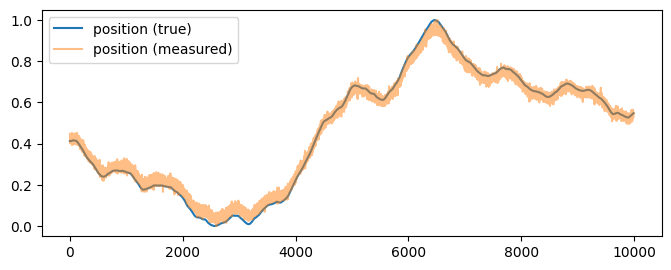

In [ ]:
#데이터 입력
print("====================시작===================")
DS ,ND = 10, 500  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS),
  ])
model.compile(optimizer = "adam",loss = 'mse',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 10,validation_split=0.2, shuffle='True')

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

DS를 줄였을 때

====================시작===================
(500, 5) (500, 1)

====================모델 생성===================
Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_479 (Dense)            (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
====================학습===================
Epoch 1/100
13/13 [==============================] - 0s 11ms/step - loss: 0.1064 - mae: 0.2540 - mse: 0.1064 - val_loss: 0.0252 - val_mae: 0.1369 - val_mse: 0.0252
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0838 - mae: 0.2279 - mse: 0.0838 - val_loss: 0.0196 - val_mae: 0.1170 - val_mse: 0.0196
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0679 - mae: 0.2121 - mse: 0.0679 - val_loss: 0.0158 - val_mae: 0.1027 - val_mse: 0.0158
Epoch 4/100
13

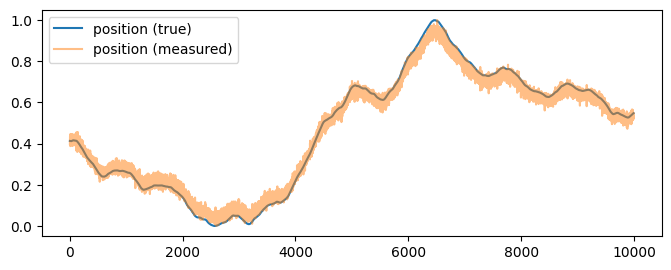

In [ ]:
#데이터 입력
print("====================시작===================")
DS ,ND = 5, 500  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS),
  ])
model.compile(optimizer = "adam",loss = 'mse',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 100,validation_split=0.2, shuffle='True')

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

다른 데이터셋에도 적용가능한지 확인

정규분포 난수가 아닌 일반 난수 생성

격자가 없는 것이 모델로 예측한 데이터

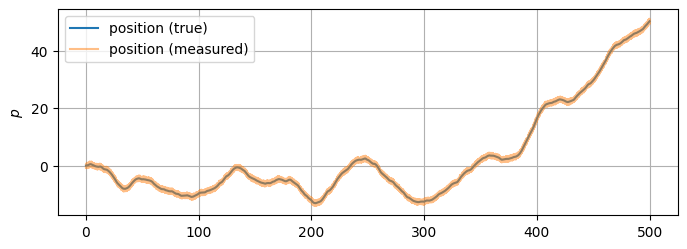

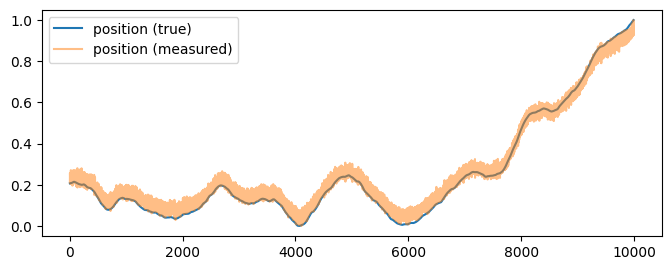

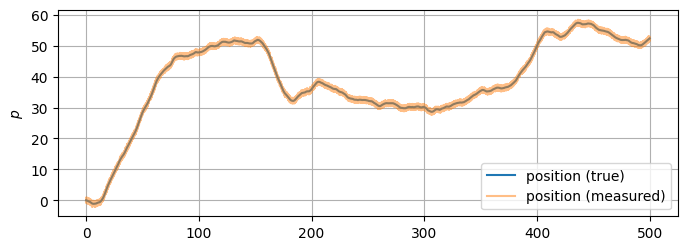

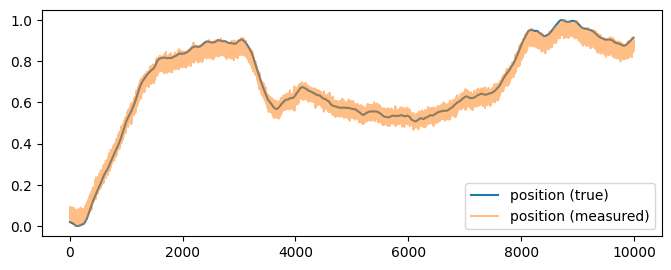

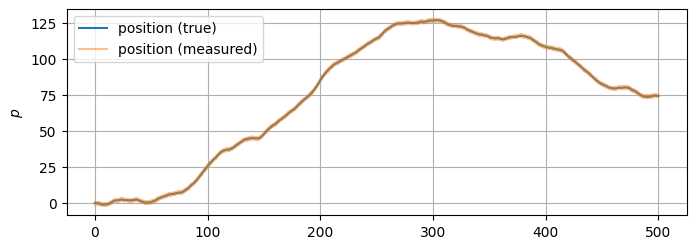

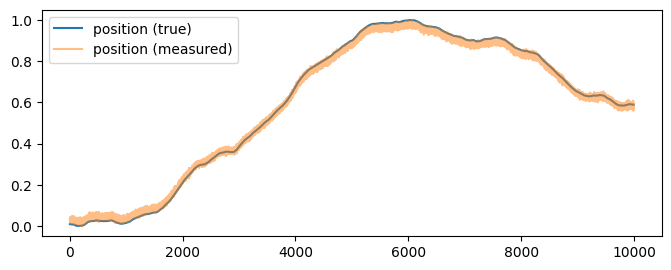

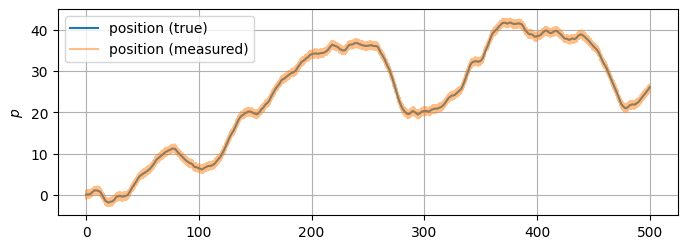

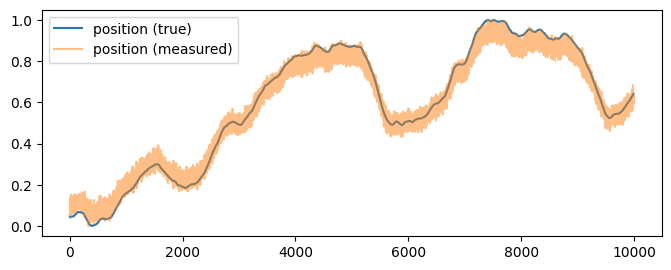

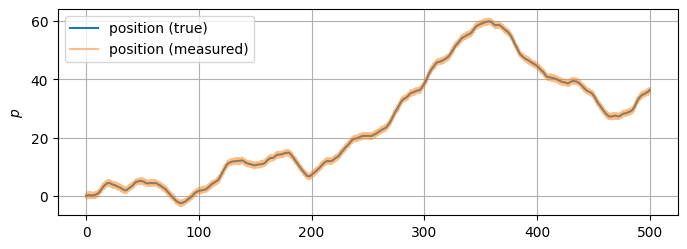

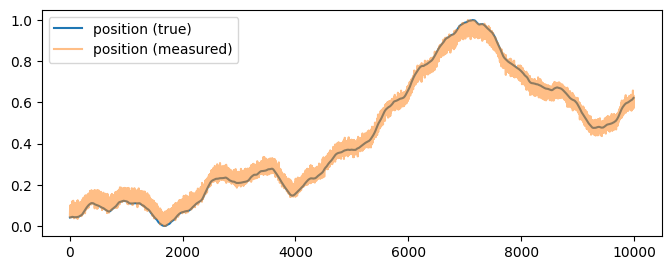

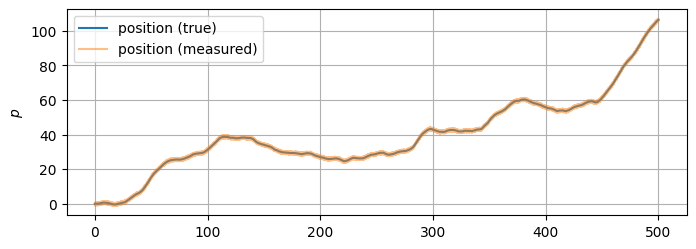

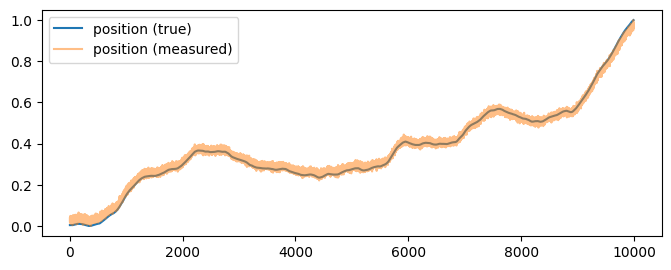

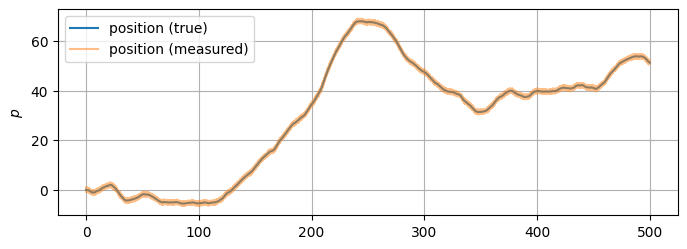

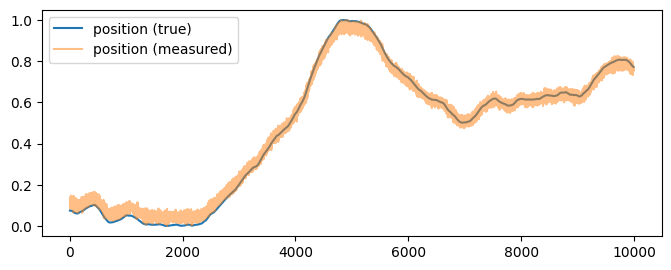

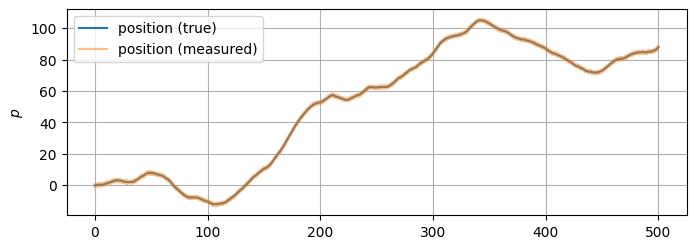

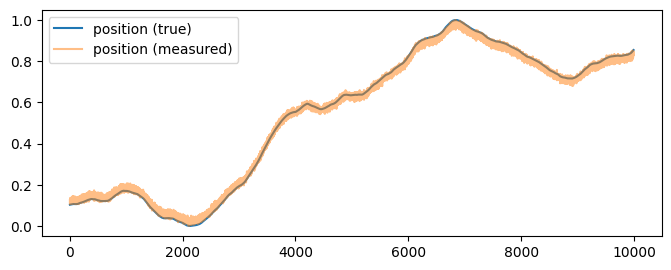

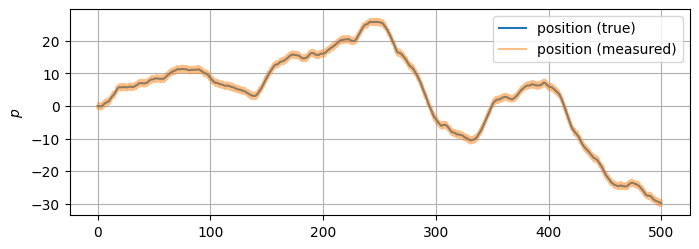

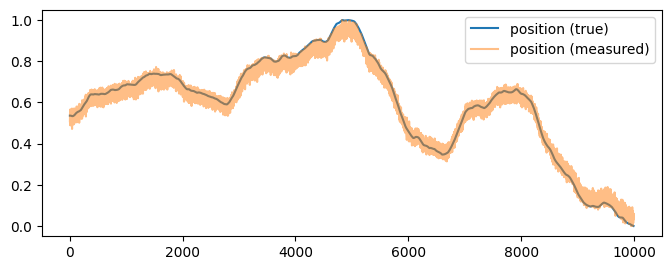

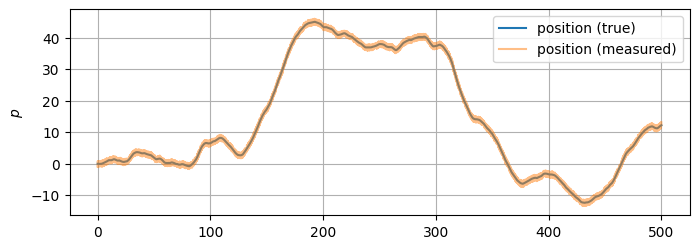

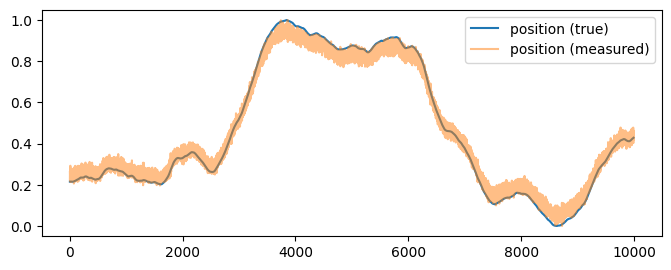

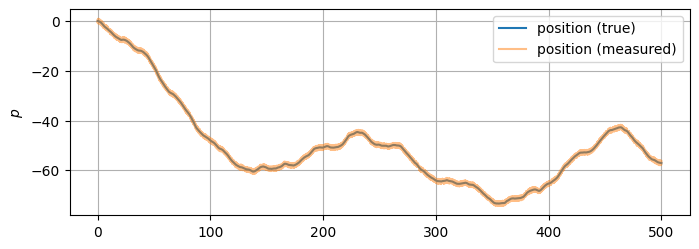

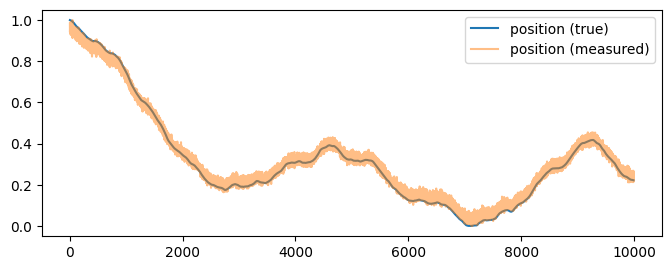

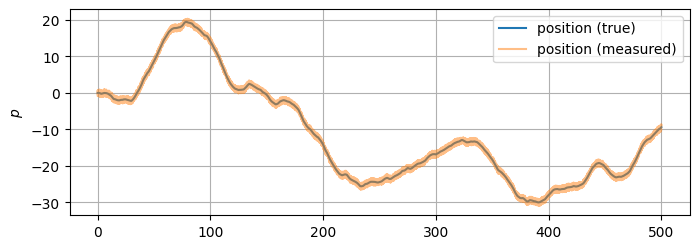

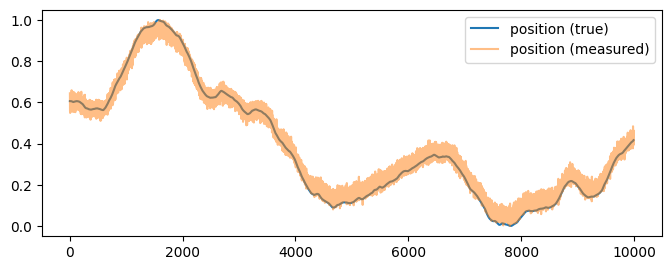

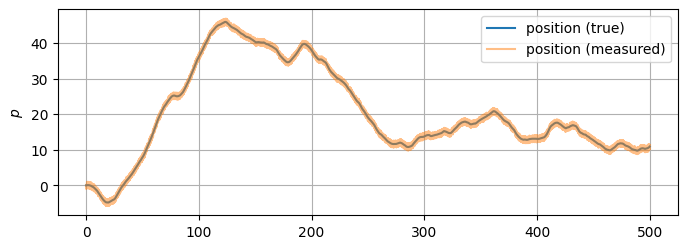

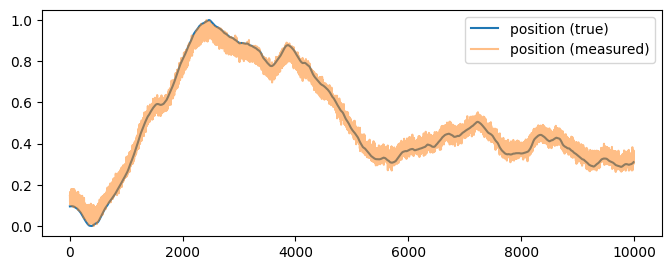

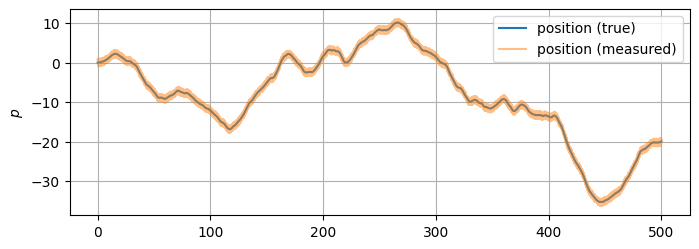

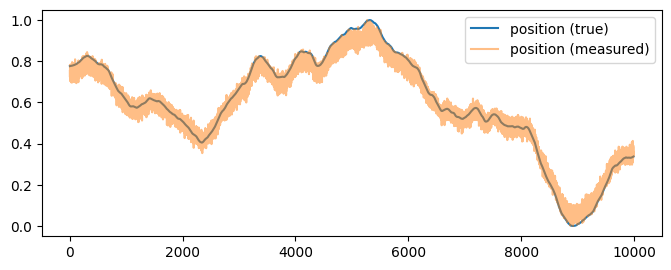

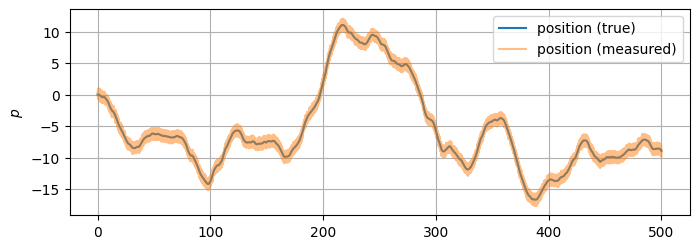

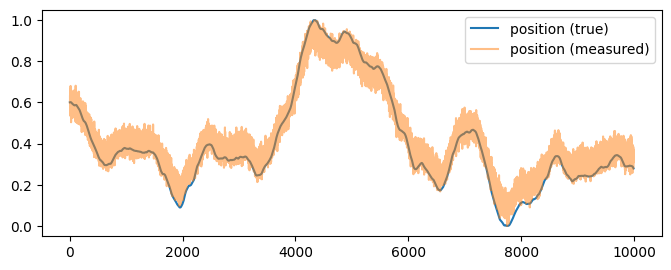

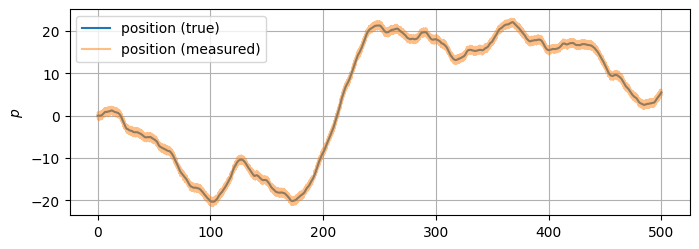

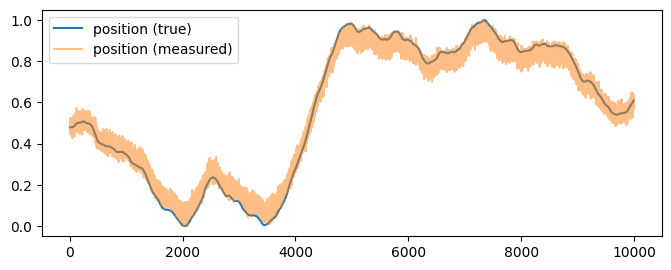

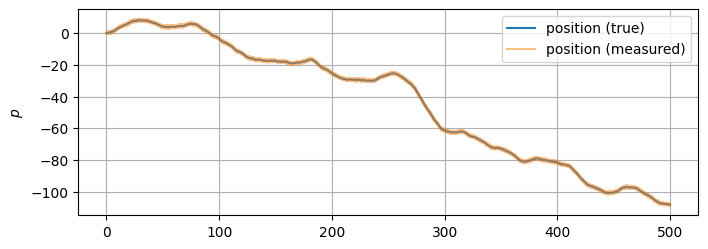

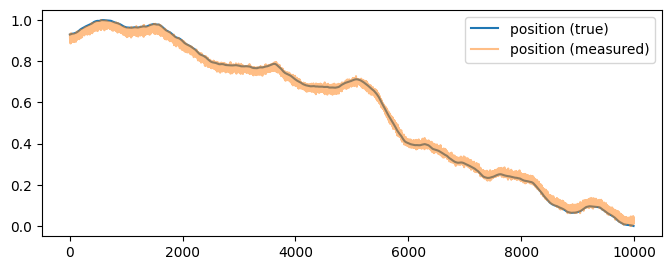

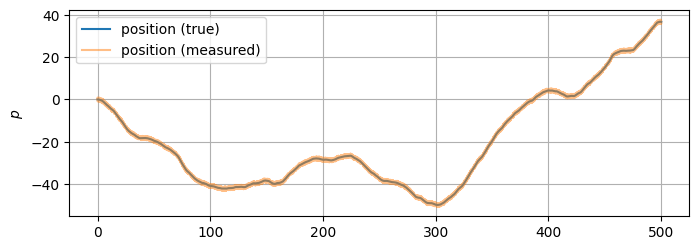

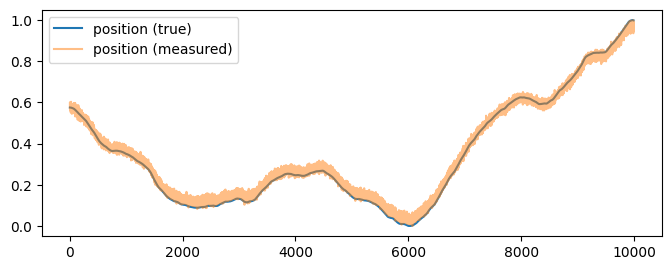

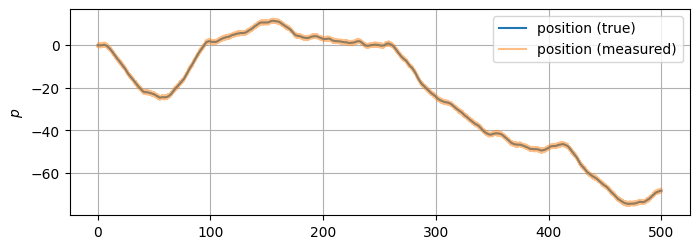

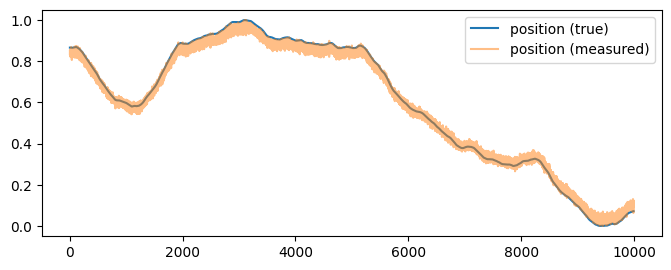

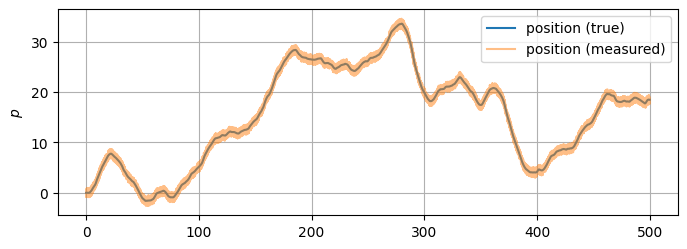

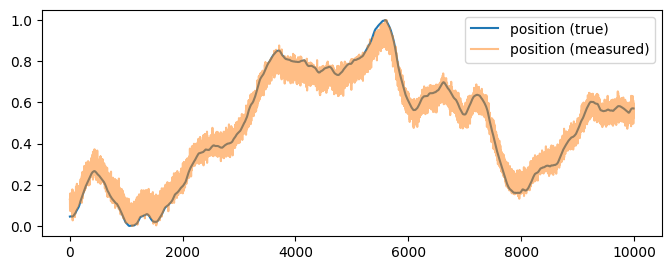

In [ ]:
for num in range(20):
  w = np.reshape(1-2*np.random.rand(N),(1,N))
  n = np.reshape(1-2*np.random.rand(N),(1,N))

  for t in range(N):
      y[:,t] = C.dot(x[:,t]) + n[:,t]
      x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])

  plt.figure(figsize=(8,6), dpi=100)
  plt.subplot(2,1,1)
  plt.plot(ts,x[0,:], label='position (true)')
  #measured 값은 y값으로 x+noise값이다.
  plt.plot(ts[:-1],y[0,:], alpha=0.5, label='position (measured)')
  plt.ylabel(r'$p$')
  plt.legend()
  plt.grid()

  input_data = np.empty((0,DS))
  true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


  for i in range(N-DS):
    reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
    input_data=np.append(input_data,[reshaped_y],axis=0)

  plt.figure(figsize=(8,3), dpi=100)
  plt.plot(Normalization(true_data), label='position (true)')
  plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
  plt.legend(loc='best')
  plt.show()


ND가 적어도 될까?

====================시작===================
(50, 10) (50, 1)

====================모델 생성===================
Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_454 (Dense)            (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
====================학습===================
Epoch 1/200
2/2 [==============================] - 0s 123ms/step - loss: 0.8856 - mae: 0.8542 - mse: 0.8856 - val_loss: 0.6521 - val_mae: 0.7591 - val_mse: 0.6521
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 0.8366 - mae: 0.8259 - mse: 0.8366 - val_loss: 0.6218 - val_mae: 0.7393 - val_mse: 0.6218
Epoch 3/200
2/2 [==============================] - 0s 25ms/step - loss: 0.8077 - mae: 0.8082 - mse: 0.8077 - val_loss: 0.5972 - val_mae: 0.7227 - val_mse: 0.5972
Epoch 4/200
2/2 

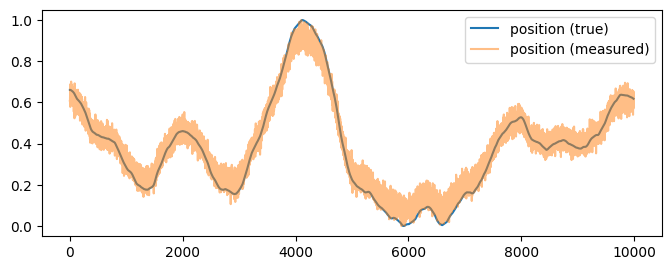

In [ ]:
#데이터 입력
print("====================시작===================")
DS ,ND = 10, 50  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS),
  ])
model.compile(optimizer = "RMSprop",loss = 'mse',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 200,validation_split=0.2, shuffle='True')

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

더 줄이면??

====================시작===================
(10, 5) (10, 1)

====================모델 생성===================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
====================학습===================
Epoch 1/100
1/1 [==============================] - 0s 464ms/step - loss: 0.0943 - mae: 0.2364 - mse: 0.0943 - val_loss: 0.9774 - val_mae: 0.9641 - val_mse: 0.9774
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0932 - mae: 0.2352 - mse: 0.0932 - val_loss: 0.9717 - val_mae: 0.9611 - val_mse: 0.9717
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0921 - mae: 0.2340 - mse: 0.0921 - val_loss: 0.9661 - val_mae: 0.9582 - val_mse: 0.9661
Epoch 4/100
1/1 [====

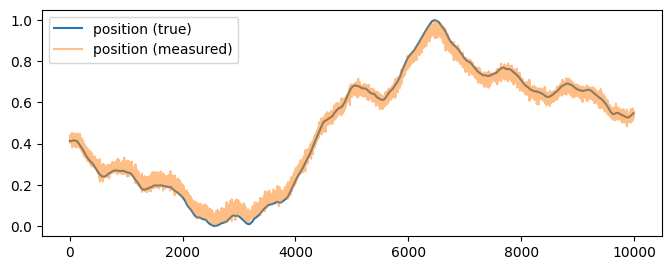

In [4]:
#데이터 입력
print("====================시작===================")
DS ,ND = 5, 10  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_dim=DS),
  ])
model.compile(optimizer = "Adam",loss = 'mse',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 100,validation_split=0.2, shuffle='True',verbose=1)

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

입력 데이터가 적어도 모델이 형성됨

층을 늘리면 정확도를 높일 수 있는지 확인

====================시작===================
(10, 5) (10, 1)

====================모델 생성===================
Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_473 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_474 (Dense)            (None, 1)                 6         
_________________________________________________________________
dense_475 (Dense)            (None, 1)                 2         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________
====================학습===================
Epoch 1/100
1/1 [==============================] - 1s 616ms/step - loss: 0.9382 - mae: 0.9153 - mse: 0.9382 - val_loss: 0.0062 - val_mae: 0.0753 - val_mse: 0.0062
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.891

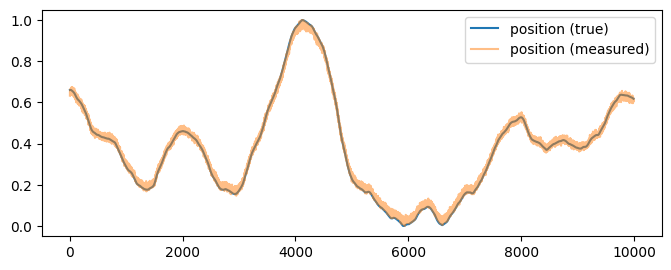

In [ ]:
#데이터 입력
print("====================시작===================")
DS ,ND = 5, 10  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(DS, input_dim=DS),
  tf.keras.layers.Dense(1, input_dim=DS),
  tf.keras.layers.Dense(1, input_dim=DS),
  ])
model.compile(optimizer = "RMSprop",loss = 'mse',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 100,validation_split=0.2, shuffle='True',verbose=1)

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

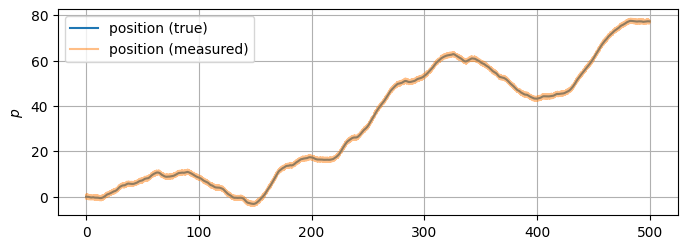

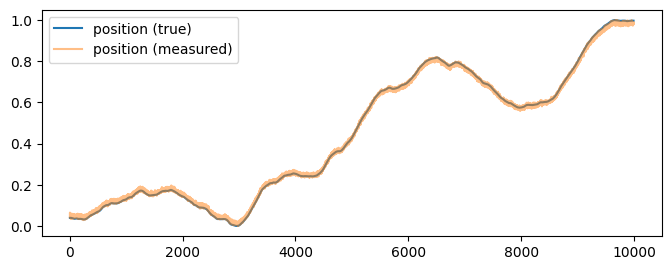

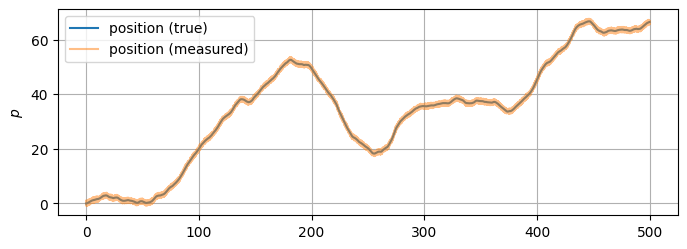

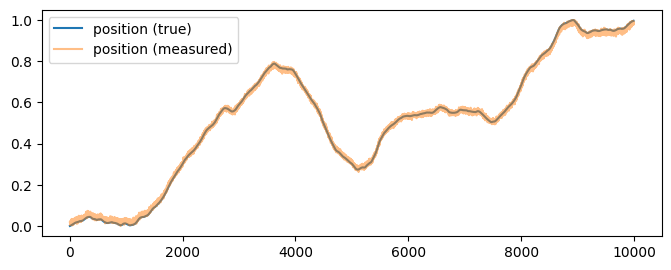

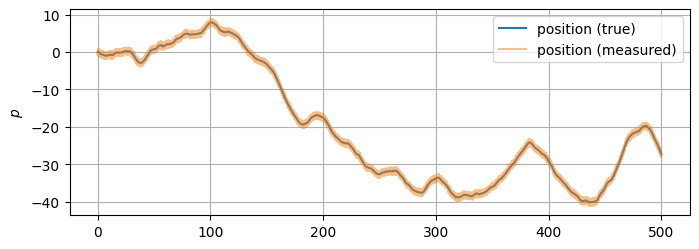

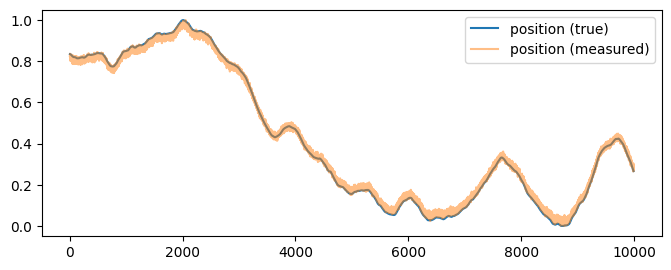

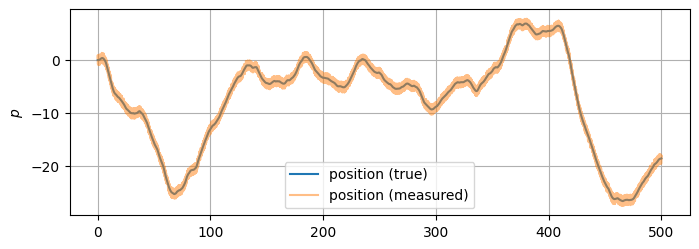

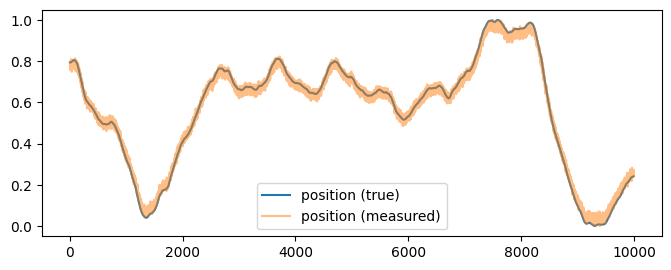

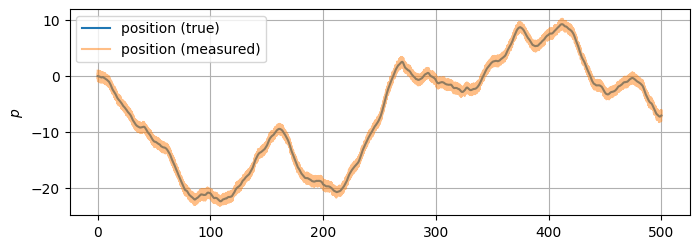

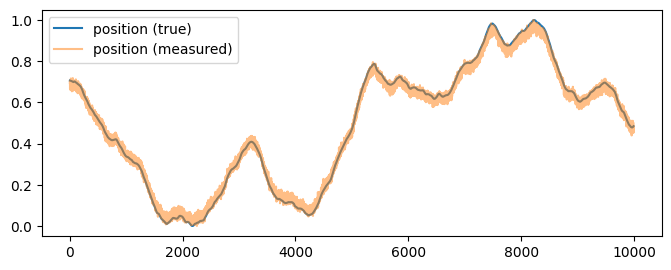

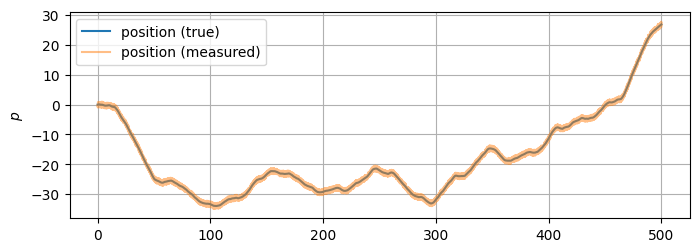

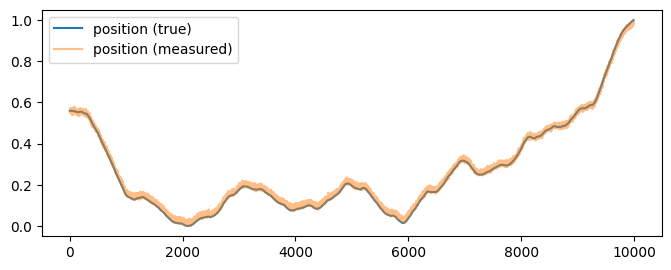

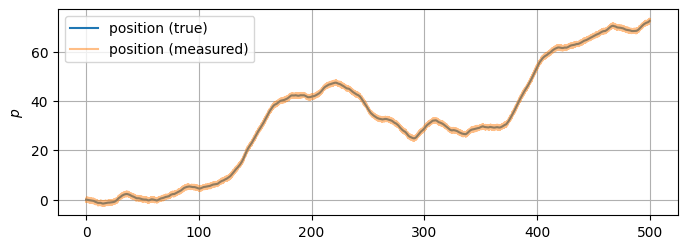

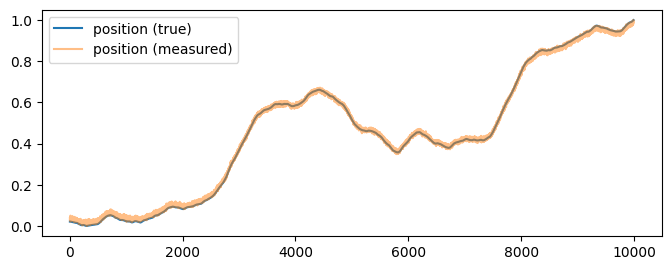

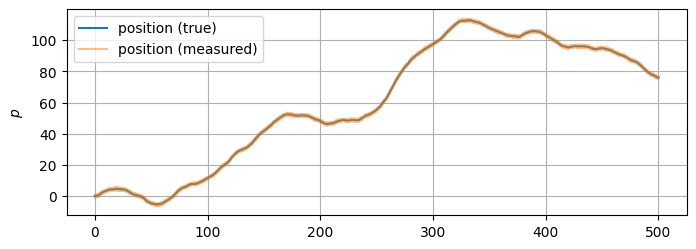

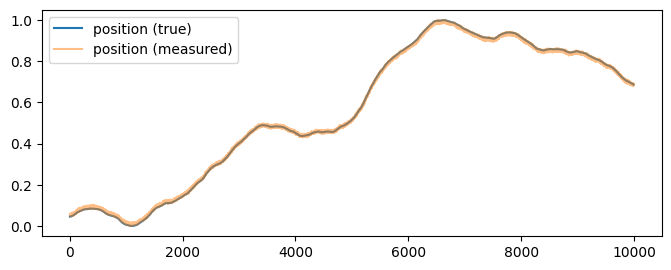

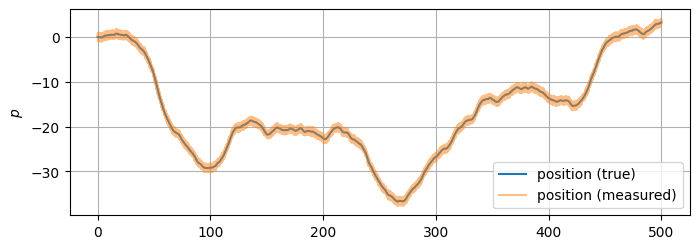

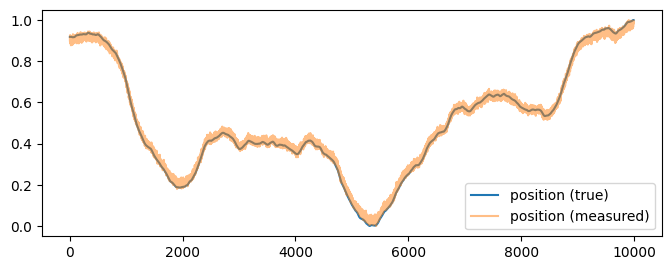

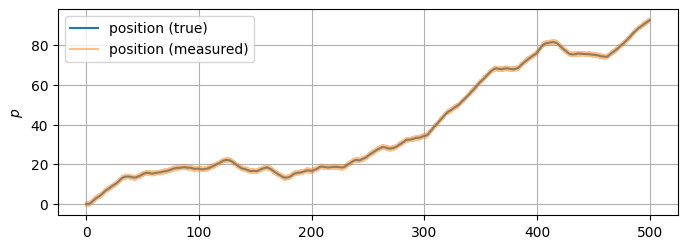

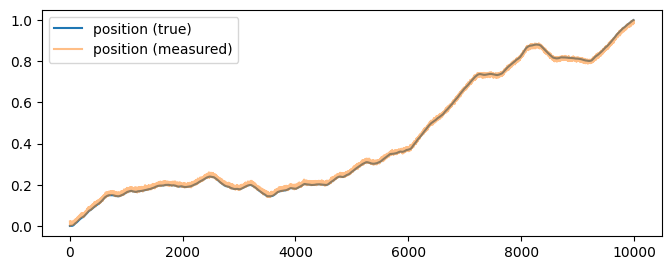

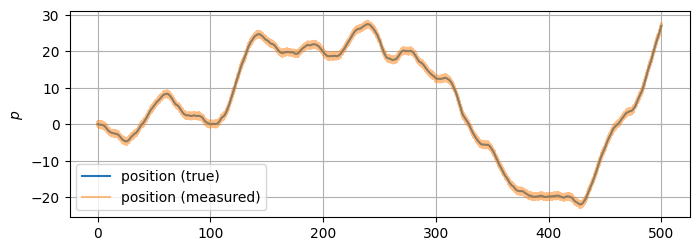

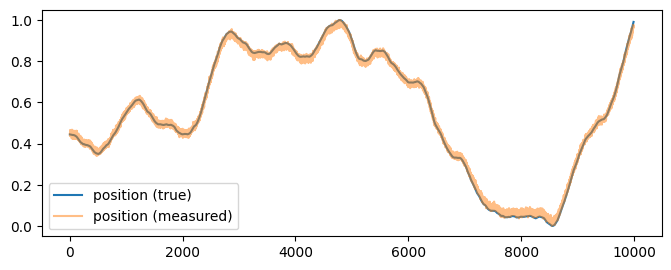

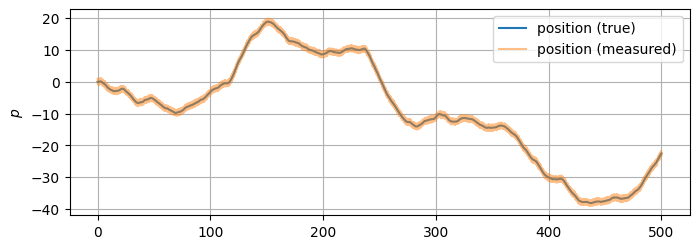

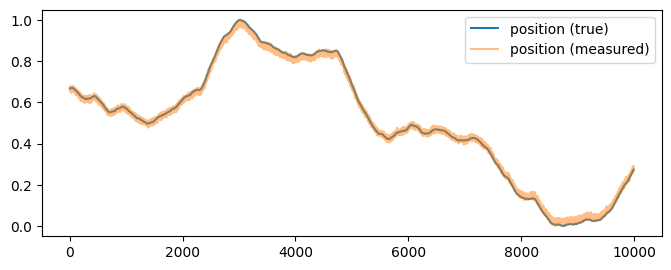

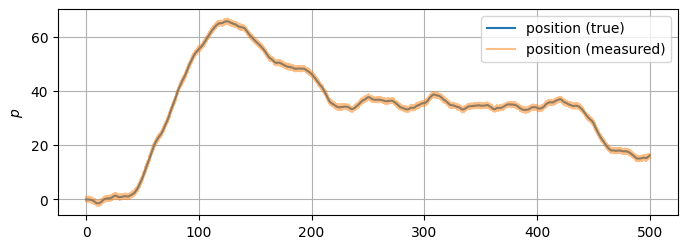

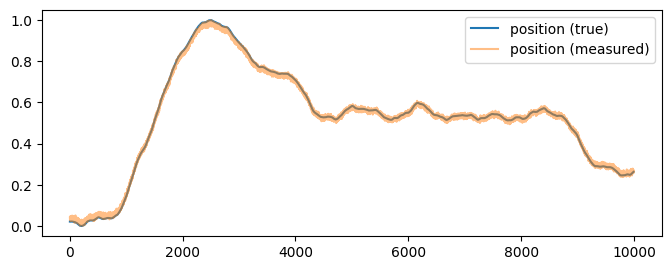

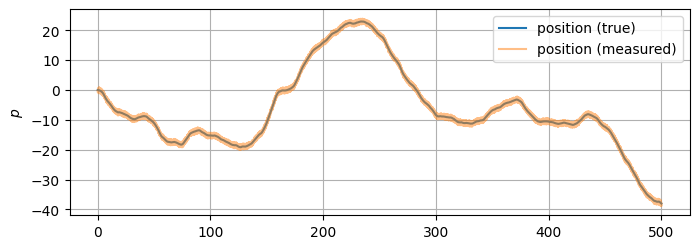

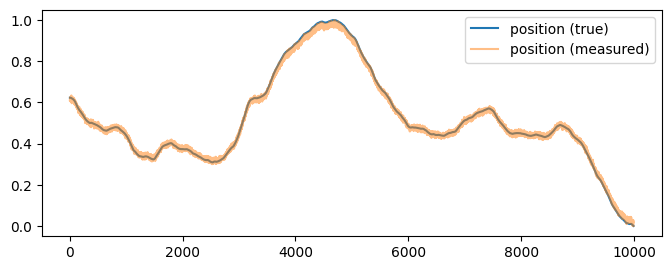

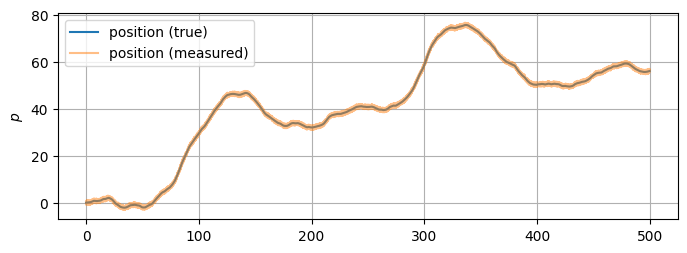

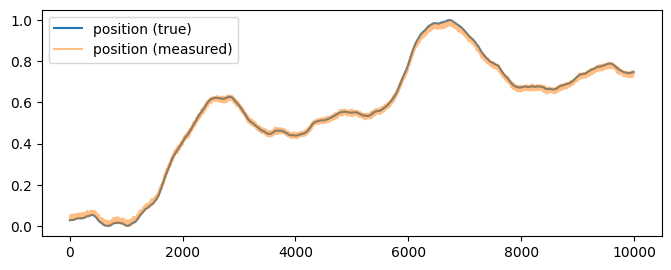

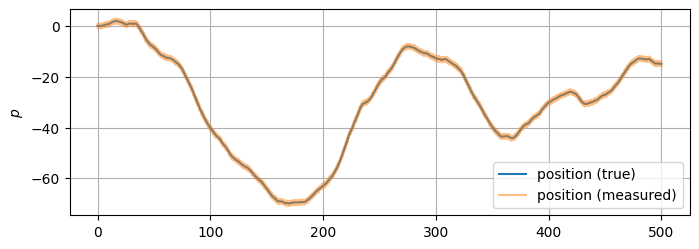

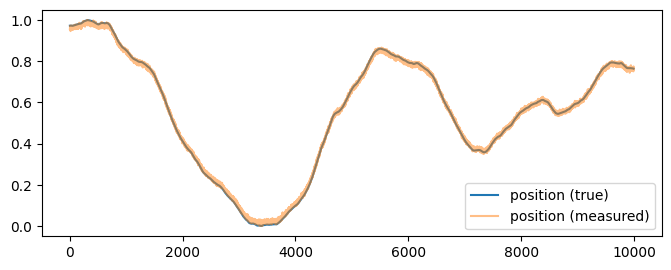

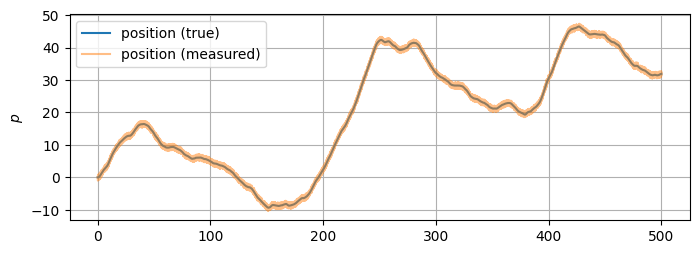

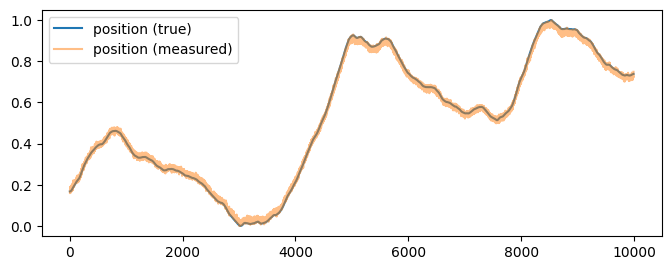

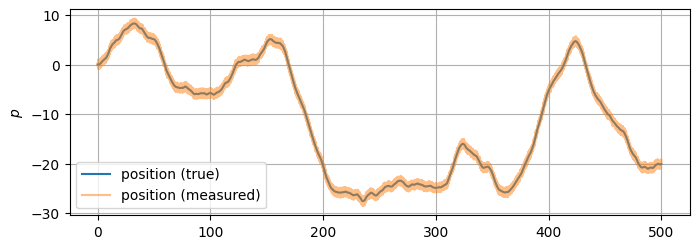

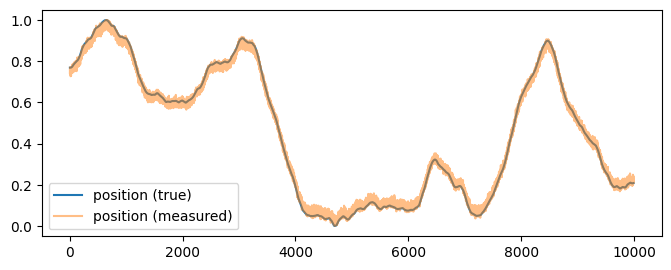

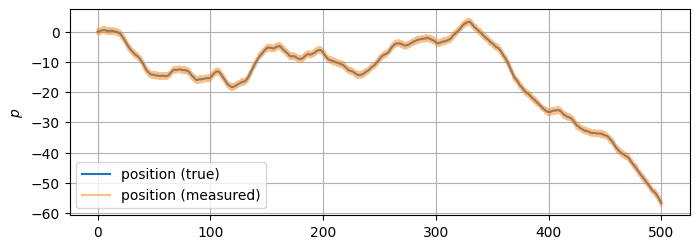

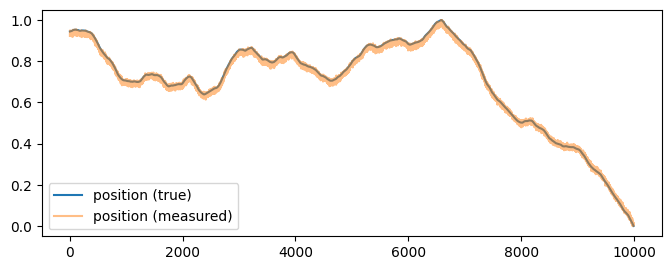

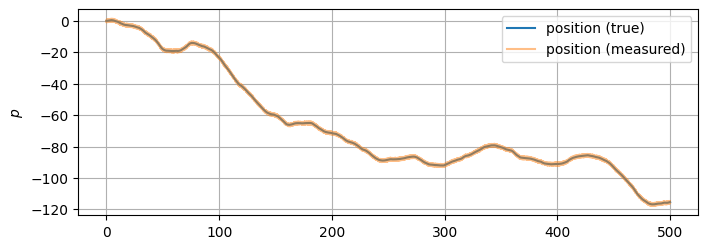

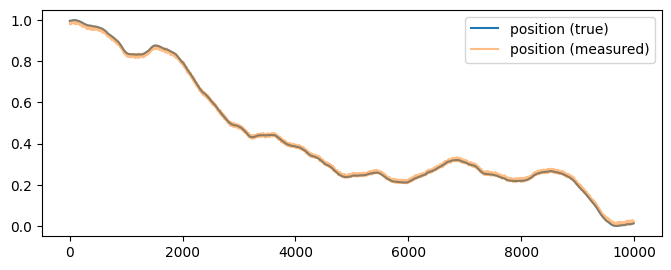

In [ ]:
for num in range(20):
  w = np.reshape(1-2*np.random.rand(N),(1,N))
  n = np.reshape(1-2*np.random.rand(N),(1,N))

  for t in range(N):
      y[:,t] = C.dot(x[:,t]) + n[:,t]
      x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])

  plt.figure(figsize=(8,6), dpi=100)
  plt.subplot(2,1,1)
  plt.plot(ts,x[0,:], label='position (true)')
  #measured 값은 y값으로 x+noise값이다.
  plt.plot(ts[:-1],y[0,:], alpha=0.5, label='position (measured)')
  plt.ylabel(r'$p$')
  plt.legend()
  plt.grid()

  input_data = np.empty((0,DS))
  true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


  for i in range(N-DS):
    reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
    input_data=np.append(input_data,[reshaped_y],axis=0)

  plt.figure(figsize=(8,3), dpi=100)
  plt.plot(Normalization(true_data), label='position (true)')
  plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
  plt.legend(loc='best')
  plt.show()
